In [158]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [159]:
loan_approval_df = pd.read_csv("../01_data/loan_approval_dataset.csv")
loan_approval_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [160]:
loan_approval_df.shape

(4269, 13)

In [161]:
loan_approval_df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [162]:
loan_approval_df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [163]:
#cleaning column names
loan_approval_df.columns = loan_approval_df.columns.str.strip()
#cleaning column values
loan_approval_df['education'] = loan_approval_df['education'].astype(str).str.strip()
loan_approval_df['self_employed'] = loan_approval_df['self_employed'].astype(str).str.strip()


In [164]:
#creation of a new column for total assets
loan_approval_df['total_assets_value']=loan_approval_df['residential_assets_value']+loan_approval_df['commercial_assets_value']+loan_approval_df['luxury_assets_value']+loan_approval_df['bank_asset_value']
loan_approval_df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets_value
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,7400000
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,20000000
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,39000000
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,28800000


In [165]:
loan_approval_df['loan_status'].value_counts(normalize=True)

loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

In [166]:
#switching categorical columns into numerical

#loan_approval_df['education']=loan_approval_df['education'].replace({'Graduate':1,'Not Graduate':0})
#loan_approval_df['self_employed'] = loan_approval_df['self_employed'].replace({'No': 0, 'Yes': 1})

#loan_approval_df

In [167]:
#Identifying features and target

features= loan_approval_df.drop('loan_status', axis=1)
target= loan_approval_df[['loan_status']]

features

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets_value
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,7400000
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,20000000
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,39000000
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,28800000


In [168]:
#Dummification

x_train,x_test,y_train,y_test= train_test_split(features,target, test_size=0.20, random_state=0)

ohe = OneHotEncoder(sparse_output = False)
ohe.fit(x_train[['education','self_employed']])
x_train_trans_np = ohe.transform(x_train[['education','self_employed']])
x_test_trans_np = ohe.transform(x_test[['education','self_employed']])

x_train_trans_df = pd.DataFrame(x_train_trans_np, columns=ohe.get_feature_names_out(), index= x_train.index)
x_test_trans_df = pd.DataFrame(x_test_trans_np, columns=ohe.get_feature_names_out(), index= x_test.index)

display(x_train_trans_df)
display(x_test_trans_df)


,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
2488,1.0,0.0,0.0,1.0
3703,0.0,1.0,0.0,1.0
3347,0.0,1.0,1.0,0.0
3487,0.0,1.0,1.0,0.0
3957,0.0,1.0,1.0,0.0
...,...,...,...,...
1033,1.0,0.0,1.0,0.0
3264,0.0,1.0,0.0,1.0
1653,0.0,1.0,0.0,1.0
2607,0.0,1.0,1.0,0.0


,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
1972,1.0,0.0,0.0,1.0
528,1.0,0.0,0.0,1.0
3540,1.0,0.0,1.0,0.0
87,0.0,1.0,0.0,1.0
1621,0.0,1.0,0.0,1.0
...,...,...,...,...
1505,0.0,1.0,0.0,1.0
2423,1.0,0.0,1.0,0.0
489,1.0,0.0,0.0,1.0
2653,0.0,1.0,1.0,0.0


In [169]:
#adding back the dummified columns and the numerical columns together

x_train_final_df = pd.concat([x_train_trans_df,x_train[['no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value','total_assets_value']]],axis=1)
display(x_train_final_df)

x_test_final_df = pd.concat([x_test_trans_df,x_test[['no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value','total_assets_value']]],axis=1)
display(x_test_final_df)


,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets_value
2488,1.0,0.0,0.0,1.0,2,2700000,6400000,18,547,5000000,1700000,9200000,1700000,17600000
3703,0.0,1.0,0.0,1.0,1,8400000,30900000,8,378,18600000,1000000,25900000,11100000,56600000
3347,0.0,1.0,1.0,0.0,2,9700000,37700000,6,601,300000,3100000,23800000,11800000,39000000
3487,0.0,1.0,1.0,0.0,5,6800000,18000000,12,690,17800000,11800000,25000000,9300000,63900000
3957,0.0,1.0,1.0,0.0,0,4300000,11000000,4,374,7100000,7300000,9300000,4700000,28400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1.0,0.0,1.0,0.0,3,600000,1200000,2,752,1100000,500000,2300000,700000,4600000
3264,0.0,1.0,0.0,1.0,5,800000,2100000,12,363,1200000,1000000,3100000,900000,6200000
1653,0.0,1.0,0.0,1.0,3,6400000,23500000,12,684,17200000,10300000,25300000,7400000,60200000
2607,0.0,1.0,1.0,0.0,4,5400000,12600000,18,786,300000,2500000,21000000,6600000,30400000


,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets_value
1972,1.0,0.0,0.0,1.0,1,8300000,17700000,10,673,23700000,5300000,28700000,4200000,61900000
528,1.0,0.0,0.0,1.0,2,7200000,23900000,4,559,4200000,12200000,17800000,10800000,45000000
3540,1.0,0.0,1.0,0.0,1,7900000,15800000,8,551,800000,3500000,18700000,8300000,31300000
87,0.0,1.0,0.0,1.0,1,8700000,28300000,8,402,20400000,13600000,27900000,10200000,72100000
1621,0.0,1.0,0.0,1.0,0,7200000,15600000,2,362,2700000,2400000,20800000,5900000,31800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,0.0,1.0,0.0,1.0,3,5300000,19600000,2,433,14700000,9900000,10800000,3000000,38400000
2423,1.0,0.0,1.0,0.0,4,5100000,16100000,14,436,11400000,2700000,13100000,6700000,33900000
489,1.0,0.0,0.0,1.0,0,7500000,16800000,16,492,21500000,4800000,25400000,11100000,62800000
2653,0.0,1.0,1.0,0.0,2,4400000,14200000,18,799,6300000,7800000,10800000,2400000,27300000


In [170]:
#calculating the KNN score

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(x_train_final_df,y_train)

knn.score(x_test_final_df,y_test)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6018735362997658

For column education_Graduate, max: 1.0 and min: 0.0.
For column education_Not Graduate, max: 1.0 and min: 0.0.
For column self_employed_No, max: 1.0 and min: 0.0.
For column self_employed_Yes, max: 1.0 and min: 0.0.
For column no_of_dependents, max: 5 and min: 0.
For column income_annum, max: 9900000 and min: 200000.
For column loan_amount, max: 39500000 and min: 300000.
For column loan_term, max: 20 and min: 2.
For column cibil_score, max: 900 and min: 300.
For column residential_assets_value, max: 28500000 and min: -100000.
For column commercial_assets_value, max: 19400000 and min: 0.
For column luxury_assets_value, max: 39200000 and min: 300000.
For column bank_asset_value, max: 14700000 and min: 0.
For column total_assets_value, max: 87100000 and min: 500000.
 
For column education_Graduate, max: 1.0 and min: 0.0.
For column education_Not Graduate, max: 1.0 and min: 0.0.
For column self_employed_No, max: 1.0 and min: 0.0.
For column self_employed_Yes, max: 1.0 and min: 0.0.
For co

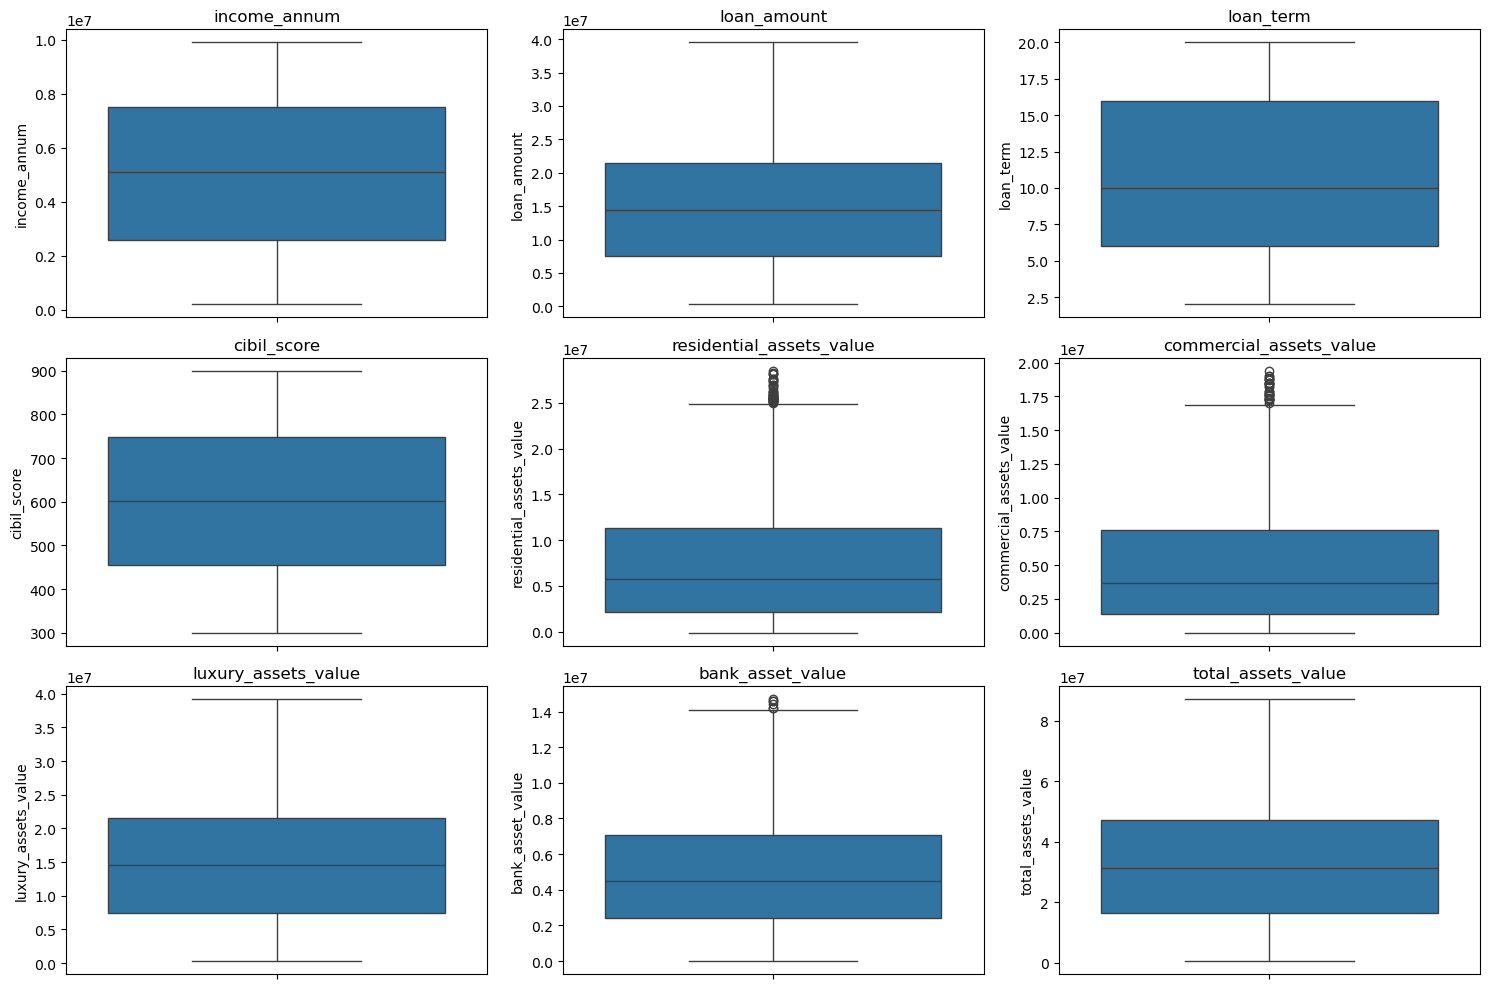

In [171]:
#Let's normalize or standardized data to check if it improves the model's performance

#Checking the columns' data range in order to decide if we normalize or standardize the data

def check_range_column(df):
    """displays the maximum and minimum value for each column of the dataframe"""
    for i in df.columns:
        max = df[i].max()
        min = df[i].min()
        print(f"For column {i}, max: {max} and min: {min}.")

check_range_column(x_train_final_df)
print(" ")
check_range_column(x_test_final_df)

#For column residential_assets_value, the maximum value in the test set is higher than in the train set
#For column total_assets_value, the maximum value is higher and the minimum value is lower in teh test set than in the train set
#This might cause an issue if we normalize the data (as it is based on the min and max).

#Checking outliers in the data in order to decide if we normalize or standardize the data

# Select numerical columns for boxplot
numerical_columns = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 
                     'residential_assets_value', 'commercial_assets_value', 
                     'luxury_assets_value', 'bank_asset_value', 'total_assets_value']

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=x_train_final_df, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

#We do have outliers in columns residential_assets_value, bank_assets_value, commercial_assets_value.
#This might cause an issue if we standardize the data (as it is based on the mean).


In [172]:
standardizer = StandardScaler()
standardizer.fit(x_train_final_df)

x_train_stand= standardizer.transform(x_train_final_df)
x_test_stand= standardizer.transform(x_test_final_df)

x_train_stand_df = pd.DataFrame(x_train_stand, columns= x_train_final_df.columns, index = x_train_final_df.index)
display(x_train_stand_df)

x_test_stand_df = pd.DataFrame(x_test_stand, columns= x_test_final_df.columns, index = x_test_final_df.index)
display(x_test_stand_df)


,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets_value
2488,0.990963,-0.990963,-0.996200,0.996200,-0.299805,-0.838252,-0.960244,1.236846,-0.313297,-0.386771,-0.753262,-0.646038,-1.011865,-0.769384
3703,-1.009119,1.009119,-0.996200,0.996200,-0.890253,1.197861,1.746279,-0.508105,-1.292451,1.720622,-0.913577,1.200004,1.881560,1.242190
3347,-1.009119,1.009119,1.003814,-1.003814,-0.299805,1.662237,2.497477,-0.857095,-0.000431,-1.115061,-0.432632,0.967867,2.097028,0.334403
3487,-1.009119,1.009119,1.003814,-1.003814,1.471536,0.626320,0.321211,0.189875,0.515218,1.596657,1.559853,1.100517,1.327500,1.618715
3957,-1.009119,1.009119,1.003814,-1.003814,-1.480700,-0.266712,-0.452081,-1.206085,-1.315626,-0.061365,0.529257,-0.634984,-0.088432,-0.212333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.990963,-0.990963,1.003814,-1.003814,0.290642,-1.588399,-1.534690,-1.555076,0.874435,-0.991097,-1.028088,-1.408774,-1.319676,-1.439908
3264,-1.009119,1.009119,-0.996200,0.996200,1.471536,-1.516957,-1.435267,0.189875,-1.379358,-0.975602,-0.913577,-1.320341,-1.258114,-1.357382
1653,-1.009119,1.009119,-0.996200,0.996200,0.290642,0.483435,0.928798,0.189875,0.480456,1.503684,1.216321,1.133680,0.742659,1.427874
2607,-1.009119,1.009119,1.003814,-1.003814,0.881089,0.126222,-0.275328,1.236846,1.071424,-1.115061,-0.570045,0.658351,0.496410,-0.109175


,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets_value
1972,0.990963,-0.990963,-0.996200,0.996200,-0.890253,1.162139,0.288070,-0.159115,0.416724,2.510894,0.071215,1.509521,-0.242337,1.515558
528,0.990963,-0.990963,-0.996200,0.996200,-0.299805,0.769205,0.972986,-1.206085,-0.243771,-0.510736,1.651461,0.304619,1.789217,0.643876
3540,0.990963,-0.990963,1.003814,-1.003814,-0.890253,1.019254,0.078177,-0.508105,-0.290122,-1.037584,-0.341024,0.404106,1.019689,-0.062754
87,-1.009119,1.009119,-0.996200,0.996200,-0.890253,1.305024,1.459056,-0.508105,-1.153400,1.999541,1.972091,1.421087,1.604530,2.041661
1621,-1.009119,1.009119,-0.996200,0.996200,-1.480700,0.769205,0.056083,-1.555076,-1.385152,-0.743169,-0.592947,0.636243,0.280942,-0.036965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,-1.009119,1.009119,-0.996200,0.996200,0.290642,0.090501,0.497964,-1.555076,-0.973791,1.116296,1.124712,-0.469172,-0.611711,0.303456
2423,0.990963,-0.990963,1.003814,-1.003814,0.881089,0.019058,0.111318,0.538865,-0.956410,0.604943,-0.524241,-0.214926,0.527191,0.071351
489,0.990963,-0.990963,-0.996200,0.996200,-1.480700,0.876369,0.188647,0.887855,-0.631956,2.169992,-0.043296,1.144734,1.881560,1.561979
2653,-1.009119,1.009119,1.003814,-1.003814,-0.299805,-0.230991,-0.098576,1.236846,1.146744,-0.185329,0.643768,-0.469172,-0.796397,-0.269069


In [173]:
#Let's try again the KNN model with standardized values

knn_stand = KNeighborsClassifier(n_neighbors = 50)
knn_stand.fit(x_train_stand_df,y_train)

knn_stand.score(x_test_stand_df,y_test)

#Model performance seems way better.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8981264637002342

In [174]:
#Calculate Performance Metrics for Standardized Model

y_pred_standardized = knn_stand.predict(x_test_stand)  # Predictions for standardized model

accuracy_standardized = accuracy_score(y_test, y_pred_standardized)
precision_standardized = precision_score(y_test, y_pred_standardized, average='weighted', zero_division=0)
recall_standardized = recall_score(y_test, y_pred_standardized, average='weighted', zero_division=0)
f1_standardized = f1_score(y_test, y_pred_standardized, average='weighted', zero_division=0)
roc_auc_standardized = roc_auc_score(y_test, knn_stand.predict_proba(x_test_stand)[:, 1])

# Display metrics for the standardized model
print("\nStandardized Model Performance:")
print(f"Accuracy: {accuracy_standardized:.2f}")
print(f"Precision: {precision_standardized:.2f}")
print(f"Recall: {recall_standardized:.2f}")
print(f"F1 Score: {f1_standardized:.2f}")
print(f"AUC-ROC: {roc_auc_standardized:.2f}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



Standardized Model Performance:
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
AUC-ROC: 0.96


In [175]:
#Let's normalize the data now

normalizer = MinMaxScaler()
normalizer.fit(x_train_final_df)

x_train_norm = normalizer.transform(x_train_final_df)
x_test_norm = normalizer.transform(x_test_final_df)

x_train_norm_df = pd.DataFrame(x_train_norm, columns=x_train_final_df.columns, index=x_train_final_df.index )
display(x_train_norm_df)
x_test_norm_df = pd.DataFrame(x_test_norm, columns=x_test_final_df.columns, index=x_test_final_df.index)
display(x_test_norm_df)


,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets_value
2488,1.0,0.0,0.0,1.0,0.4,0.257732,0.155612,0.888889,0.411667,0.178322,0.087629,0.228792,0.115646,0.197460
3703,0.0,1.0,0.0,1.0,0.2,0.845361,0.780612,0.333333,0.130000,0.653846,0.051546,0.658098,0.755102,0.647806
3347,0.0,1.0,1.0,0.0,0.4,0.979381,0.954082,0.222222,0.501667,0.013986,0.159794,0.604113,0.802721,0.444573
3487,0.0,1.0,1.0,0.0,1.0,0.680412,0.451531,0.555556,0.650000,0.625874,0.608247,0.634961,0.632653,0.732102
3957,0.0,1.0,1.0,0.0,0.0,0.422680,0.272959,0.111111,0.123333,0.251748,0.376289,0.231362,0.319728,0.322171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1.0,0.0,1.0,0.0,0.6,0.041237,0.022959,0.000000,0.753333,0.041958,0.025773,0.051414,0.047619,0.047344
3264,0.0,1.0,0.0,1.0,1.0,0.061856,0.045918,0.555556,0.105000,0.045455,0.051546,0.071979,0.061224,0.065820
1653,0.0,1.0,0.0,1.0,0.6,0.639175,0.591837,0.555556,0.640000,0.604895,0.530928,0.642674,0.503401,0.689376
2607,0.0,1.0,1.0,0.0,0.8,0.536082,0.313776,0.888889,0.810000,0.013986,0.128866,0.532134,0.448980,0.345266


,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets_value
1972,1.0,0.0,0.0,1.0,0.2,0.835052,0.443878,0.444444,0.621667,0.832168,0.273196,0.730077,0.285714,0.709007
528,1.0,0.0,0.0,1.0,0.4,0.721649,0.602041,0.111111,0.431667,0.150350,0.628866,0.449871,0.734694,0.513857
3540,1.0,0.0,1.0,0.0,0.2,0.793814,0.395408,0.333333,0.418333,0.031469,0.180412,0.473008,0.564626,0.355658
87,0.0,1.0,0.0,1.0,0.2,0.876289,0.714286,0.333333,0.170000,0.716783,0.701031,0.709512,0.693878,0.826790
1621,0.0,1.0,0.0,1.0,0.0,0.721649,0.390306,0.000000,0.103333,0.097902,0.123711,0.526992,0.401361,0.361432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,0.0,1.0,0.0,1.0,0.6,0.525773,0.492347,0.000000,0.221667,0.517483,0.510309,0.269923,0.204082,0.437644
2423,1.0,0.0,1.0,0.0,0.8,0.505155,0.403061,0.666667,0.226667,0.402098,0.139175,0.329049,0.455782,0.385681
489,1.0,0.0,0.0,1.0,0.0,0.752577,0.420918,0.777778,0.320000,0.755245,0.247423,0.645244,0.755102,0.719400
2653,0.0,1.0,1.0,0.0,0.4,0.432990,0.354592,0.888889,0.831667,0.223776,0.402062,0.269923,0.163265,0.309469


In [176]:
#Let's try again the KNN model with normalize values

knn_norm = KNeighborsClassifier(n_neighbors = 50)
knn_norm.fit(x_train_norm_df,y_train)

knn_norm.score(x_test_norm_df,y_test)

#Model performance seems slightly better than with the standardized values.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9110070257611241

In [177]:
#Calculate Performance Metrics for Normalized Model

y_pred_normalized = knn_norm.predict(x_test_norm)  # Predictions for normalized model

accuracy_standardized = accuracy_score(y_test, y_pred_normalized)
precision_standardized = precision_score(y_test, y_pred_normalized, average='weighted', zero_division=0)
recall_standardized = recall_score(y_test, y_pred_normalized, average='weighted', zero_division=0)
f1_standardized = f1_score(y_test, y_pred_normalized, average='weighted', zero_division=0)
roc_auc_standardized = roc_auc_score(y_test, knn_norm.predict_proba(x_test_stand)[:, 1])

# Display metrics for the standardized model
print("\nStandardized Model Performance:")
print(f"Accuracy: {accuracy_standardized:.2f}")
print(f"Precision: {precision_standardized:.2f}")
print(f"Recall: {recall_standardized:.2f}")
print(f"F1 Score: {f1_standardized:.2f}")
print(f"AUC-ROC: {roc_auc_standardized:.2f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



Standardized Model Performance:
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
AUC-ROC: 0.94


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


/var/folders/84/2vk315td0qq3r5sg29wp35000000gn/T/ipykernel_67969/3384209217.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_approval_copy_corr_df['loan_status'] = loan_approval_df['loan_status'].replace({' Approved':1,' Rejected':0})
/var/folders/84/2vk315td0qq3r5sg29wp35000000gn/T/ipykernel_67969/3384209217.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_approval_copy_corr_df['education']=loan_approval_df['education'].replace({'Graduate':1,'Not Graduate':0})
/var/folders/84/2vk315td0qq3r5sg29wp35000000gn/T/ipyke

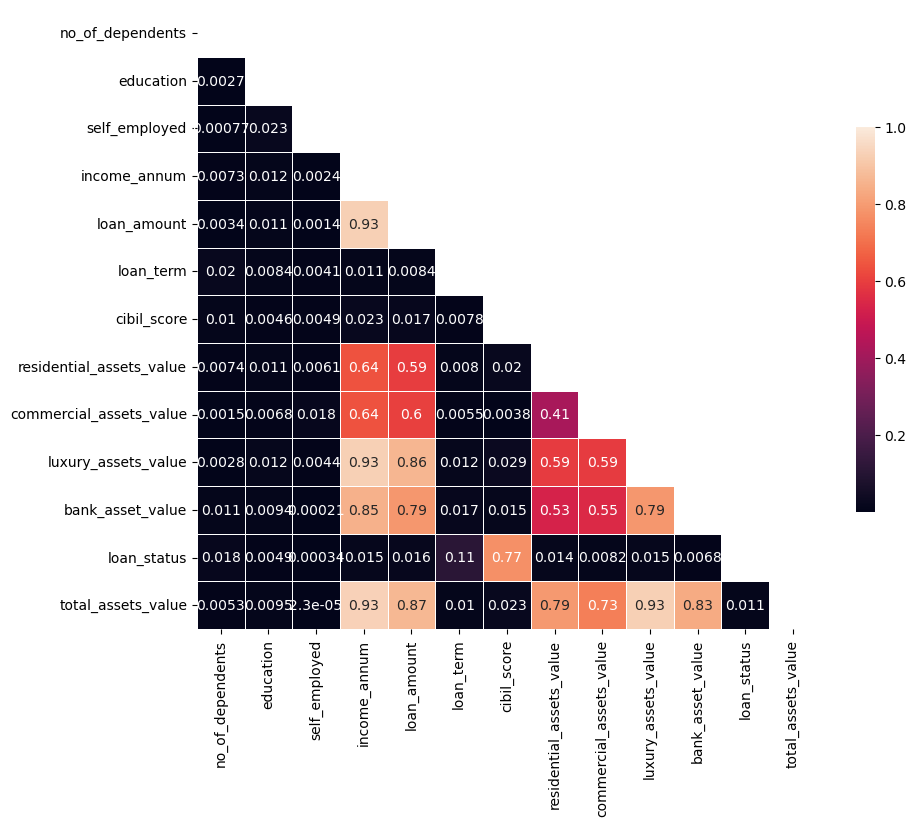

In [178]:
#Let's look at the features correlation with the target and between themselves

loan_approval_copy_corr_df = loan_approval_df.copy()
loan_approval_copy_corr_df['loan_status'] = loan_approval_df['loan_status'].replace({' Approved':1,' Rejected':0})
loan_approval_copy_corr_df['education']=loan_approval_df['education'].replace({'Graduate':1,'Not Graduate':0})
loan_approval_copy_corr_df['self_employed'] = loan_approval_df['self_employed'].replace({'No': 0, 'Yes': 1})
loan_approval_copy_corr_df = loan_approval_copy_corr_df.drop('loan_id', axis=1)


corr = np.abs(loan_approval_copy_corr_df.corr())
mask = np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()


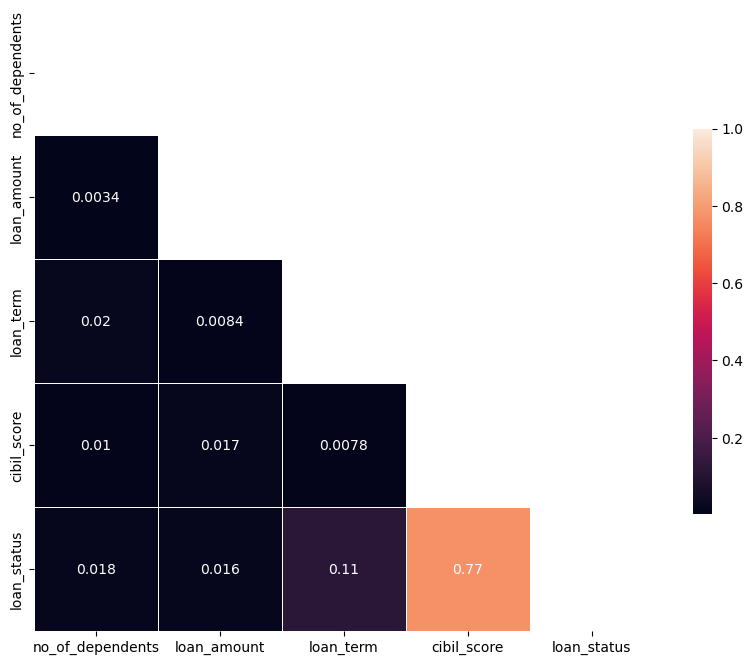

In [179]:
loan_approval_copy_corr_df = loan_approval_copy_corr_df.drop('total_assets_value', axis=1)
loan_approval_copy_corr_df = loan_approval_copy_corr_df.drop('income_annum', axis=1)
loan_approval_copy_corr_df = loan_approval_copy_corr_df.drop('luxury_assets_value', axis=1)
loan_approval_copy_corr_df = loan_approval_copy_corr_df.drop('bank_asset_value', axis=1)
loan_approval_copy_corr_df = loan_approval_copy_corr_df.drop('commercial_assets_value', axis=1)
loan_approval_copy_corr_df = loan_approval_copy_corr_df.drop('residential_assets_value', axis=1)
loan_approval_copy_corr_df = loan_approval_copy_corr_df.drop('education', axis=1)
loan_approval_copy_corr_df = loan_approval_copy_corr_df.drop('self_employed', axis=1)


corr = np.abs(loan_approval_copy_corr_df.corr())
mask = np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [205]:
#Let's use the KNN on the new dataframe with high correlated features

loan_approval_copy_corr_df


,no_of_dependents,loan_amount,loan_term,cibil_score,loan_status
0,2,29900000,12,778,1
1,0,12200000,8,417,0
2,3,29700000,20,506,0
3,3,30700000,8,467,0
4,5,24200000,20,382,0
...,...,...,...,...,...
4264,5,2300000,12,317,0
4265,0,11300000,20,559,1
4266,2,23900000,18,457,0
4267,1,12800000,8,780,1


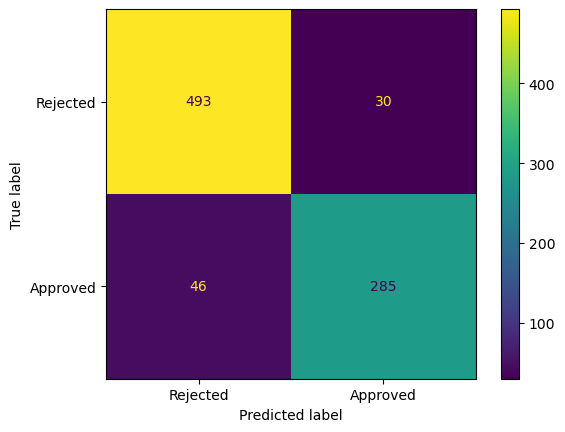

In [180]:
#we want to avoid false positive as a Bank as we do not want to approve a loan to someone who cannot pay/fulfill their engagement
#Let's look at the confusion matrix and the precision
                                     
confusion_matrix = metrics.confusion_matrix(y_test.values, y_pred_normalized)
confusion_matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rejected", "Approved"])

cm_display.plot()
plt.show()

